# we all should start by importing our libary

In [63]:
import pandas as pd
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('Housing.csv')

In [65]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# To not make it harder for now lets just use a single varible then we should 2 in the next lesson :)
# Well so what varible should we choose???
- choose with the higest corrlation for now

In [66]:
df["guestroom"] = df["guestroom"].map({'yes': 1, 'no': 0})
df["mainroad"] = df["mainroad"].map({'yes': 1, 'no': 0})
df["basement"] = df["basement"].map({'yes': 1, 'no': 0})
df["hotwaterheating"] = df["hotwaterheating"].map({'yes': 1, 'no': 0})
df["airconditioning"] = df["airconditioning"].map({'yes': 1, 'no': 0})
df["prefarea"] = df["prefarea"].map({'yes': 1, 'no': 0})
df["furnishingstatus"] = df["furnishingstatus"].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [67]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [68]:
df.corr().sort_values(by='price', ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
parking,0.384394,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
prefarea,0.329777,0.234779,0.079023,0.063472,0.044425,0.199876,0.160897,0.228083,-0.059411,0.117382,0.091627,1.000000,0.107686
furnishingstatus,0.304721,0.171445,0.123244,0.143559,0.104672,0.156726,0.118328,0.112831,0.031628,0.150477,0.177539,0.107686,1.000000
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726


# seems like we could just use the area

In [69]:
x = df[["area"]]
y = df[["price"]]

# scatter ploting

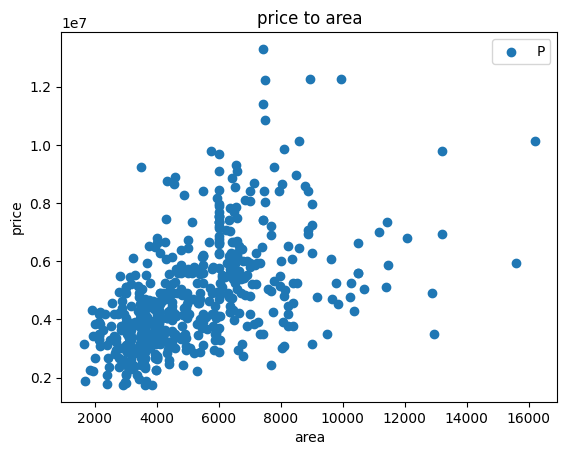

In [70]:
plt.scatter(x, y)
plt.title("price to area")
plt.xlabel("area")
plt.ylabel("price")
plt.legend ("Price")
plt.show()


# we should use this so we can train our model by using train test split first

In [71]:
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=0)

# import sklearn linear regression model

In [72]:
model = lm.LinearRegression()

# fit the data

In [73]:
model.fit(X_train, y_train)

LinearRegression()

# see the prediction might be not accurate at all

In [74]:
model.predict(X_test)

array([[4230316.29633974],
       [6901321.58923638],
       [3973671.65965572],
       [8602780.47688228],
       [4068725.22879795],
       [5347195.73376093],
       [4159026.11948306],
       [3983177.01656994],
       [3998385.5876327 ],
       [6606655.52489547],
       [5180851.98776203],
       [4211305.58251129],
       [3968918.98119861],
       [5209368.0585047 ],
       [5173722.97007636],
       [3484145.77857324],
       [4658057.35747977],
       [5190357.34467625],
       [3802575.2351997 ],
       [4467950.21919531],
       [6202677.85604099],
       [5394722.51833204],
       [4705584.14205088],
       [3137200.2512041 ],
       [5380464.48296071],
       [3826338.62748526],
       [5656119.83347317],
       [5028766.27713446],
       [3897628.80434193],
       [5380464.48296071],
       [4420423.43462419],
       [3410479.26248801],
       [6321494.81746878],
       [4249327.01016818],
       [3812080.59211393],
       [5389969.83987493],
       [5180851.98776203],
 

# well we only use 1 varibale dont expect to get a good score at all

In [75]:
model.score(X_test, y_test)

0.3067292122216638